In [1]:
import os
import sys
import copy
import numpy as np
import matplotlib.pyplot as plt
import h5py

sys.path.append(os.path.dirname(os.getcwd()))
from observables import plot_counts_with_curve

In [2]:
# backend_name = 'ibm_lagos'
# physical_qubits = [1, 2]

backend_name = 'ibm_kawasaki'
physical_qubits = [4, 7]

num_sites = 2
num_tsteps = 8
tsteps_per_rqd = 2
num_rqd_steps = num_tsteps // tsteps_per_rqd

aJ = 1.
am = 0.5
omegadt = 0.2

In [3]:
results_file_name = f'{backend_name}_{"_".join(map(str, physical_qubits))}.h5'
state_file_name = f'{backend_name}_{"_".join(map(str, physical_qubits))}_state.pkl'

/home/iiyama/qc_random/four_qubit_schwinger/observables.py:41: RuntimeWarning: invalid value encountered in true_divide
  probs /= total


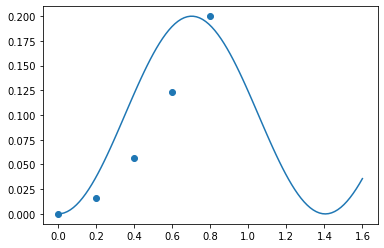

In [4]:
with h5py.File(results_file_name, 'r') as source:
    forward_counts = []
    fmt = '{:0%db}' % num_sites
    for arr in source['forward_counts']:
        forward_counts.append(dict((fmt.format(k), v) for k, v in enumerate(arr)))
        
    plot_counts_with_curve(forward_counts, num_sites, aJ, am, omegadt, num_tsteps, initial_state=None, num_toys=0)

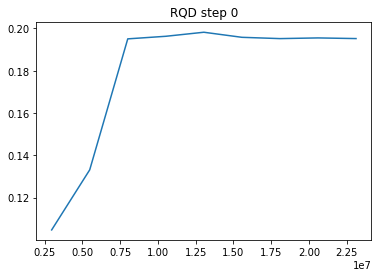

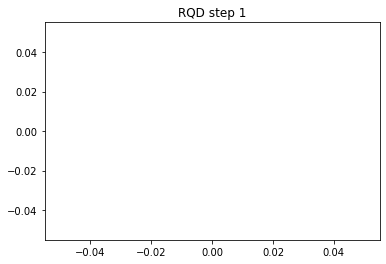

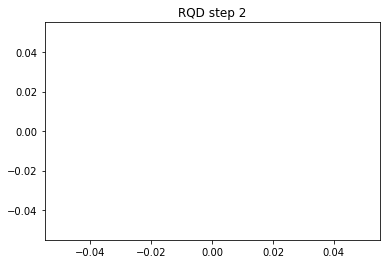

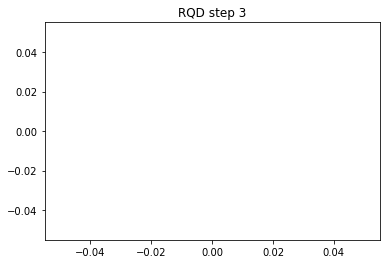

In [5]:
with h5py.File(results_file_name, 'r') as source:
    for rqd_step in range(num_rqd_steps):
        plt.subplots(1, 1)
        num_sweeps = source['num_sweeps'][rqd_step]
        plt.plot(source['shots'][rqd_step, :num_sweeps], source['costs'][rqd_step, :num_sweeps])
        plt.title('RQD step {}'.format(rqd_step))